In [1]:
import pandas as pd
import pickle
import glob
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300

In [2]:
datasets = [
    'CBF',
    'ItalyPowerDemand',
    'ECG200',
    'ECGFiveDays',
    'Plane',
    'ShapeletSim',
    'SonyAIBORobotSurface1',
    'SonyAIBORobotSurface2',
    'Trace',
    'TwoLeadECG'
]
uncertainty_levels = [
    '0_1',
    '0_8',
    '2_0'
]
similarity_measures = [
    'FOTS',
    'UED',
    'ED'
]

classes_dict = {
    'CBF': 3,
    'ItalyPowerDemand': 2,
    'ECG200': 2,
    'ECGFiveDays': 2,
    'Plane': 7,
    'ShapeletSim': 2,
    'SonyAIBORobotSurface1': 2,
    'SonyAIBORobotSurface2': 2,
    'Trace': 4,
    'TwoLeadECG': 2
}

## Fetch metrics from results file

In [3]:
results_version = '12_07'

In [4]:
results_paths = glob.glob(os.path.join(results_version, '*.dat'))
print('results_paths:', len(results_paths))

results_paths: 90


In [5]:
index = pd.MultiIndex.from_product([datasets, uncertainty_levels, similarity_measures],
                                   names=['dataset', 'uncertainty_level', 'similarity_measure'])
df_results = pd.DataFrame(index=index, columns=['RI', 'time', 'lenSubsequence', 'num_clusters', 'num_classes'])

filename_pattern = re.compile('results_(\w*)_(\d_\d)_(\w*).dat')

for results_path in results_paths:
    filename = filename_pattern.match(os.path.basename(results_path))
    dataset = filename.group(1)
    uncertainty_level = filename.group(2)
    similarity_measure = filename.group(3)
    print('dataset:', dataset)
    print('uncertainty_level:', uncertainty_level)
    print('similarity_measure:', similarity_measure)
    
    with open(results_path, 'rb') as f:
        results = pickle.load(f)
        
        lenSubsequences = list(results.keys())
        print('lenSubsequences:', lenSubsequences)

        bestLenSubsequence = lenSubsequences[0]
        bestRI = results[bestLenSubsequence]['RI']
        for curLenSubsequence in lenSubsequences:
            curRI = results[curLenSubsequence]['RI']
            print('lenSubsequence:', curLenSubsequence, '\tRI:', curRI)
            if curRI > bestRI:
                bestRI = curRI
                bestLenSubsequence = curLenSubsequence
        print('bestLenSubsequence:', bestLenSubsequence)
        print('bestRI:', bestRI)
        print()

        for lenSubsequence in lenSubsequences:
            df_results.loc[(dataset, uncertainty_level, similarity_measure), 'RI'] = float(results[bestLenSubsequence]['RI'])
            df_results.loc[(dataset, uncertainty_level, similarity_measure), 'time'] = float(results[bestLenSubsequence]['time'])
            df_results.loc[(dataset, uncertainty_level, similarity_measure), 'lenSubsequence'] = int(bestLenSubsequence)
            df_results.loc[(dataset, uncertainty_level, similarity_measure), 'num_clusters'] = int(results[bestLenSubsequence]['num_clusters'])
            df_results.loc[(dataset, uncertainty_level, similarity_measure), 'num_classes'] = classes_dict[dataset]

dataset: CBF
uncertainty_level: 0_1
similarity_measure: ED
lenSubsequences: [42, 43, 44, 45, 46]
lenSubsequence: 42 	RI: 0.485461300739609
lenSubsequence: 43 	RI: 0.4894637545285137
lenSubsequence: 44 	RI: 0.48498211743463315
lenSubsequence: 45 	RI: 0.486637267497714
lenSubsequence: 46 	RI: 0.4903804530249893
bestLenSubsequence: 46
bestRI: 0.4903804530249893

dataset: CBF
uncertainty_level: 0_1
similarity_measure: FOTS
lenSubsequences: [4, 5, 6, 7, 8]
lenSubsequence: 4 	RI: 0.4854288922069053
lenSubsequence: 5 	RI: 0.6169265136520944
lenSubsequence: 6 	RI: 0.6268527842401935
lenSubsequence: 7 	RI: 0.6456242693612047
lenSubsequence: 8 	RI: 0.4805259441878769
bestLenSubsequence: 7
bestRI: 0.6456242693612047

dataset: CBF
uncertainty_level: 0_1
similarity_measure: UED
lenSubsequences: [36, 37, 38, 39, 41, 43, 44]
lenSubsequence: 36 	RI: 0.4566084470525597
lenSubsequence: 37 	RI: 0.48804009398474485
lenSubsequence: 38 	RI: 0.48804009398474485
lenSubsequence: 39 	RI: 0.4848594279893978
lenS

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2894: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


dataset: ECGFiveDays
uncertainty_level: 2_0
similarity_measure: ED
lenSubsequences: [30, 32, 34, 36, 38]
lenSubsequence: 30 	RI: 0.5002408490184121
lenSubsequence: 32 	RI: 0.5028056348421414
lenSubsequence: 34 	RI: 0.5007327959496369
lenSubsequence: 36 	RI: 0.5006200581112312
lenSubsequence: 38 	RI: 0.500179355652009
bestLenSubsequence: 32
bestRI: 0.5028056348421414

dataset: ECGFiveDays
uncertainty_level: 2_0
similarity_measure: FOTS
lenSubsequences: [10, 14, 18]
lenSubsequence: 10 	RI: 0.5003894579872197
lenSubsequence: 14 	RI: 0.5011632495144587
lenSubsequence: 18 	RI: 0.5010043916512507
bestLenSubsequence: 14
bestRI: 0.5011632495144587

dataset: ECGFiveDays
uncertainty_level: 2_0
similarity_measure: UED
lenSubsequences: [30, 32, 34, 36, 38]
lenSubsequence: 30 	RI: 0.501665445340084
lenSubsequence: 32 	RI: 0.5009608338500484
lenSubsequence: 34 	RI: 0.5001332356272067
lenSubsequence: 36 	RI: 0.5014604674520736
lenSubsequence: 38 	RI: 0.5014348452160723
bestLenSubsequence: 30
bestRI: 

lenSubsequences: [11, 14, 15, 16]
lenSubsequence: 11 	RI: 0.6170854271356784
lenSubsequence: 14 	RI: 0.6112562814070351
lenSubsequence: 15 	RI: 0.6187939698492463
lenSubsequence: 16 	RI: 0.6591457286432161
bestLenSubsequence: 16
bestRI: 0.6591457286432161

dataset: ShapeletSim
uncertainty_level: 2_0
similarity_measure: ED
lenSubsequences: [10, 12, 13, 14]
lenSubsequence: 10 	RI: 0.49844221105527636
lenSubsequence: 12 	RI: 0.5030653266331658
lenSubsequence: 13 	RI: 0.5009547738693467
lenSubsequence: 14 	RI: 0.49814070351758793
bestLenSubsequence: 12
bestRI: 0.5030653266331658

dataset: ShapeletSim
uncertainty_level: 2_0
similarity_measure: FOTS
lenSubsequences: [13, 14, 15]
lenSubsequence: 13 	RI: 0.4985929648241206
lenSubsequence: 14 	RI: 0.5037185929648241
lenSubsequence: 15 	RI: 0.50321608040201
bestLenSubsequence: 14
bestRI: 0.5037185929648241

dataset: ShapeletSim
uncertainty_level: 2_0
similarity_measure: UED
lenSubsequences: [11, 14, 15, 16]
lenSubsequence: 11 	RI: 0.498291457286

lenSubsequences: [10, 11, 12, 18, 19, 20]
lenSubsequence: 10 	RI: 0.8743718592964824
lenSubsequence: 11 	RI: 0.8743718592964824
lenSubsequence: 12 	RI: 0.8743718592964824
lenSubsequence: 18 	RI: 0.8743718592964824
lenSubsequence: 19 	RI: 0.8743718592964824
lenSubsequence: 20 	RI: 0.8743718592964824
bestLenSubsequence: 10
bestRI: 0.8743718592964824

dataset: Trace
uncertainty_level: 0_1
similarity_measure: FOTS
lenSubsequences: [7, 8, 9, 12, 13, 14]
lenSubsequence: 7 	RI: 0.6933165829145729
lenSubsequence: 8 	RI: 0.4291457286432161
lenSubsequence: 9 	RI: 0.39376884422110553
lenSubsequence: 12 	RI: 0.5735678391959799
lenSubsequence: 13 	RI: 0.40457286432160805
lenSubsequence: 14 	RI: 0.6752261306532663
bestLenSubsequence: 7
bestRI: 0.6933165829145729

dataset: Trace
uncertainty_level: 0_1
similarity_measure: UED
lenSubsequences: [10, 11, 12, 14, 15, 16, 18, 19, 20]
lenSubsequence: 10 	RI: 0.8743718592964824
lenSubsequence: 11 	RI: 0.8743718592964824
lenSubsequence: 12 	RI: 0.748743718592

In [6]:
# Output to the console
df_results

RI          time  \
dataset    uncertainty_level similarity_measure                           
CBF        0_1               FOTS                0.645624  31580.362402   
                             UED                  0.48804   1018.535535   
                             ED                   0.49038    555.690794   
           0_8               FOTS                0.634267  29846.330181   
                             UED                 0.478669    998.459506   
...                                                   ...           ...   
TwoLeadECG 0_8               UED                 0.510599   1290.166833   
                             ED                  0.500573    512.225466   
           2_0               FOTS                0.500349  25272.739114   
                             UED                 0.501127   1878.857225   
                             ED                   0.49978    607.078098   

                                                lenSubsequence num_clusters  \
dataset    uncertainty_level similarity_measure                               
CBF        0_1               FOTS                            7           16   
                             UED                            37            3   
                             ED                             46            4   
           0_8               FOTS                            6           15   
                             UED                            38            4   
...                                                        ...          ...   
TwoLeadECG 0_8               UED                            17            6   
                             ED                             20            6   
           2_0               FOTS                           15           14   
                             UED                            14            3   
                             ED                             17            8   

                                                num_classes  
dataset    uncertainty_level similarity_measure              
CBF        0_1               FOTS                         3  
                             UED                          3  
                             ED                           3  
           0_8               FOTS                         3  
                             UED                          3  
...                                                     ...  
TwoLeadECG 0_8               UED                          2  
                             ED                           2  
           2_0               FOTS                         2  
                             UED                          2  
                             ED                           2  

[90 rows x 5 columns]

## Export the big table to Excel

In [10]:
df_results.to_excel(os.path.join(results_version, 'results_table.xlsx'))

In [16]:
df_results.to_latex(os.path.join(results_version, 'results_table.tex'), float_format='{:0.3f}'.format, multirow=True)

## Generate barplots

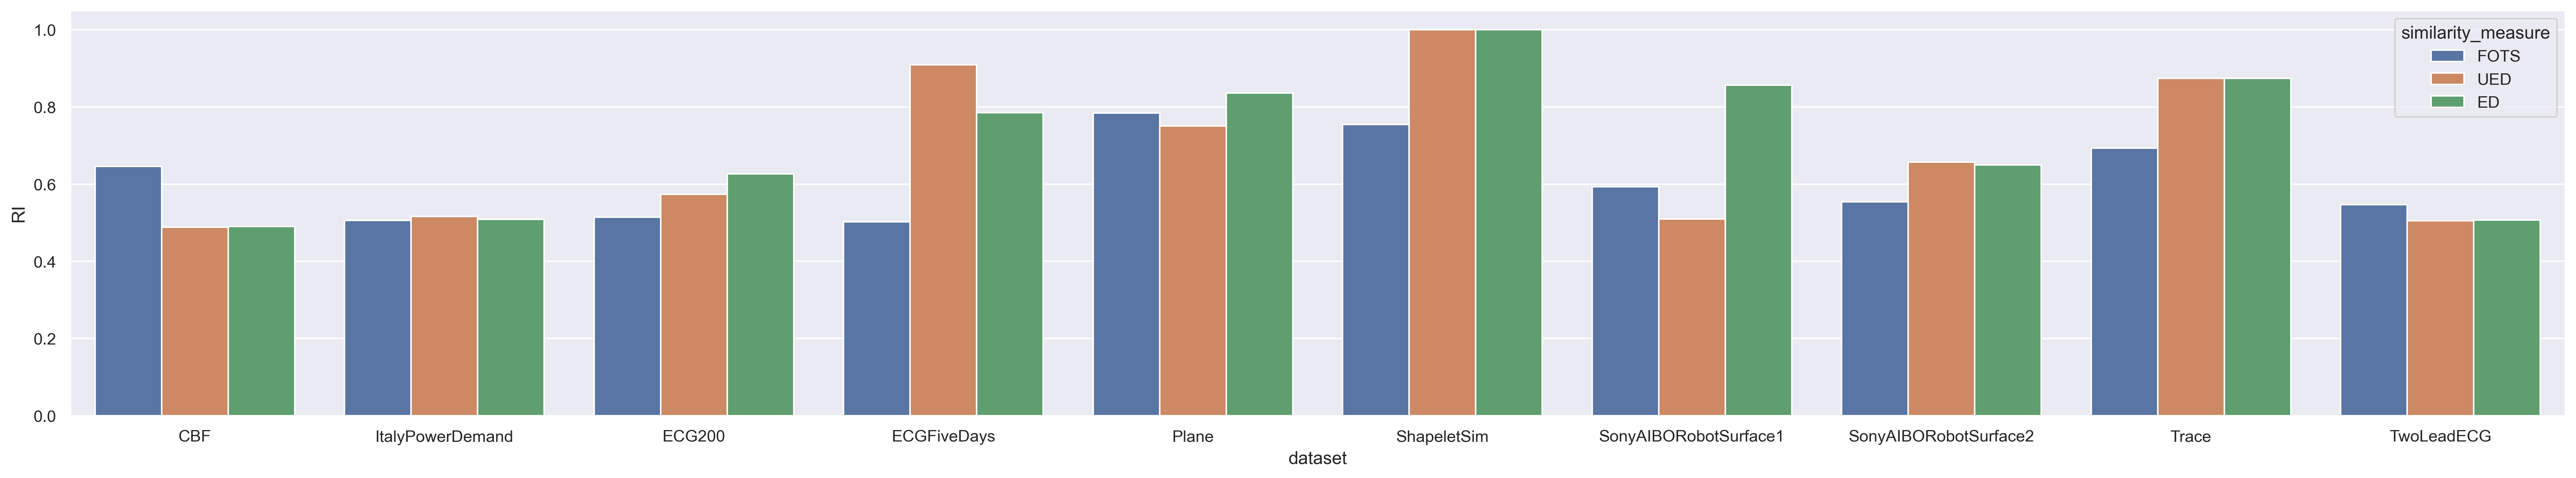

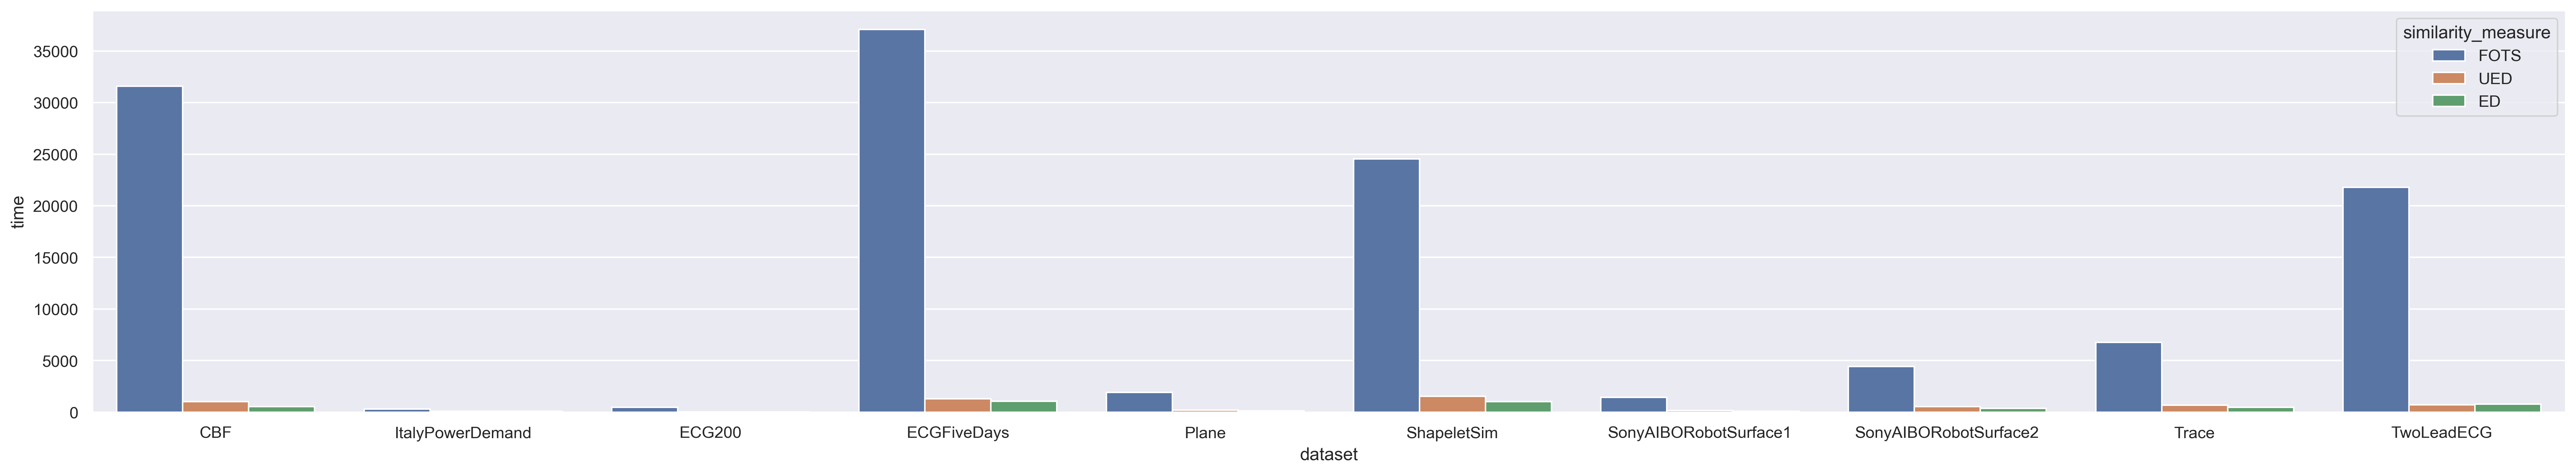

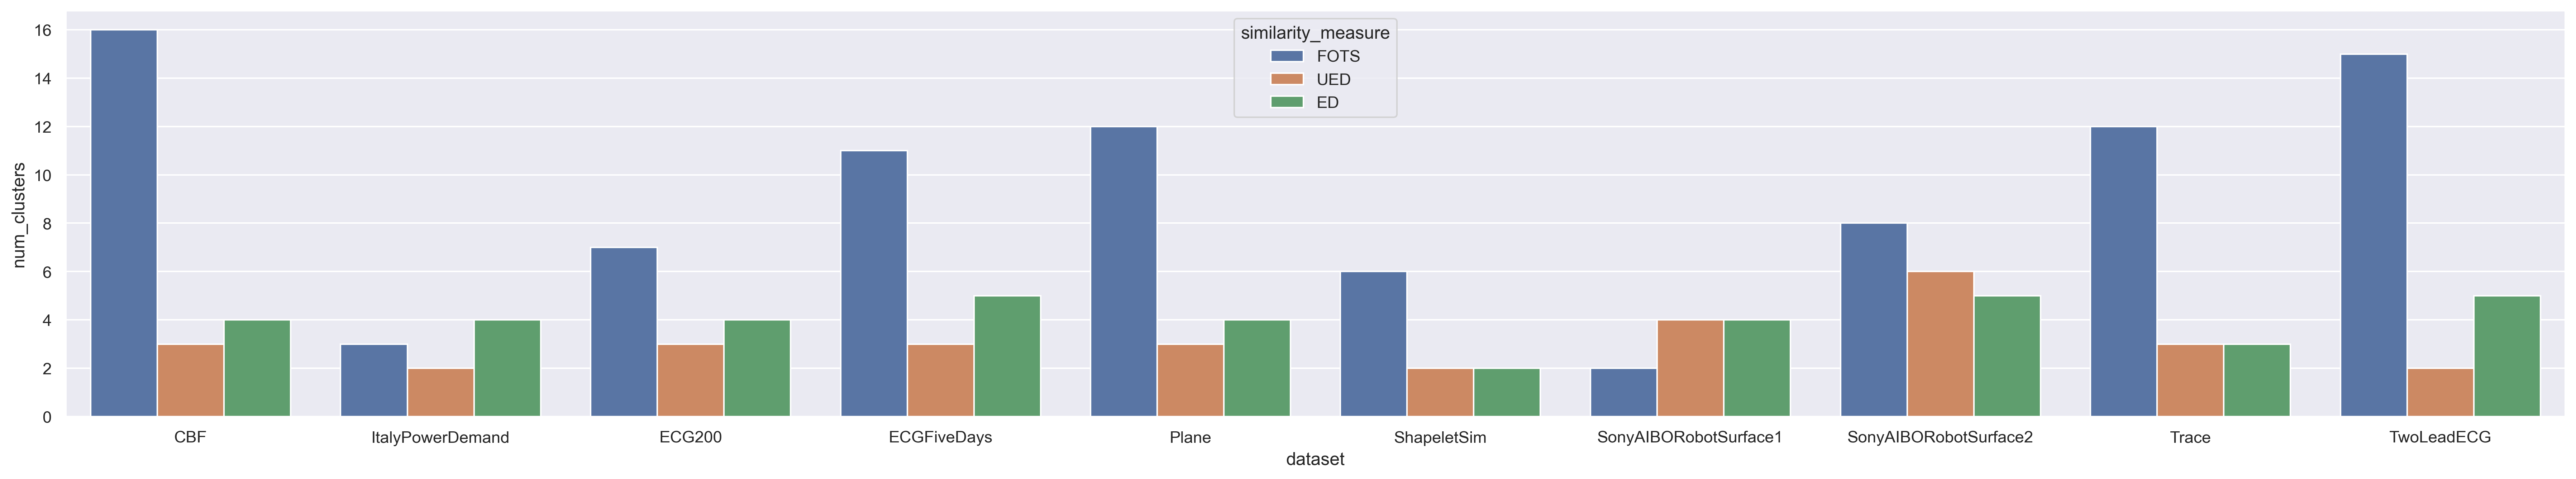

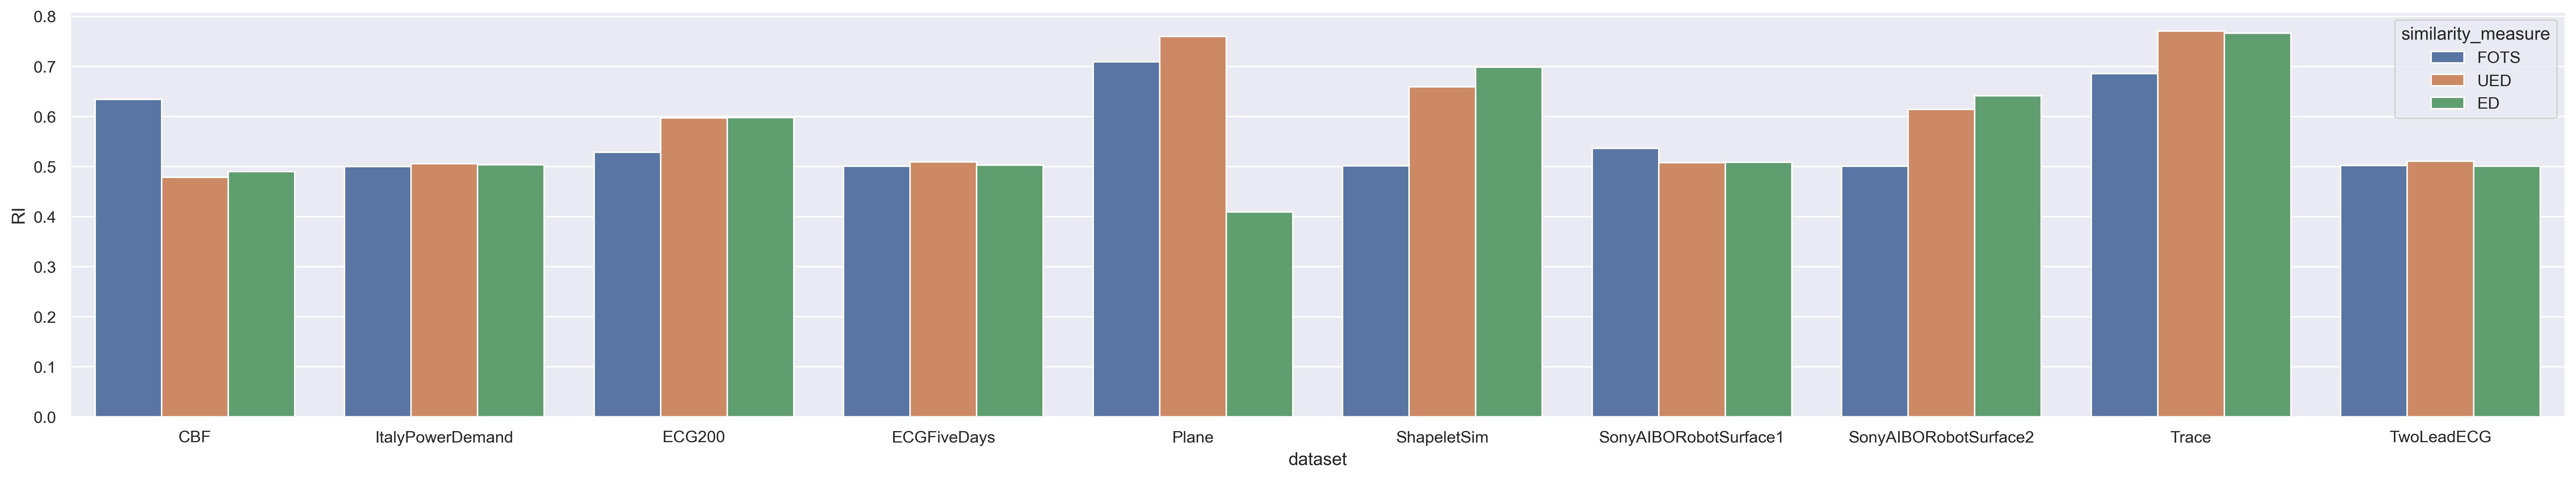

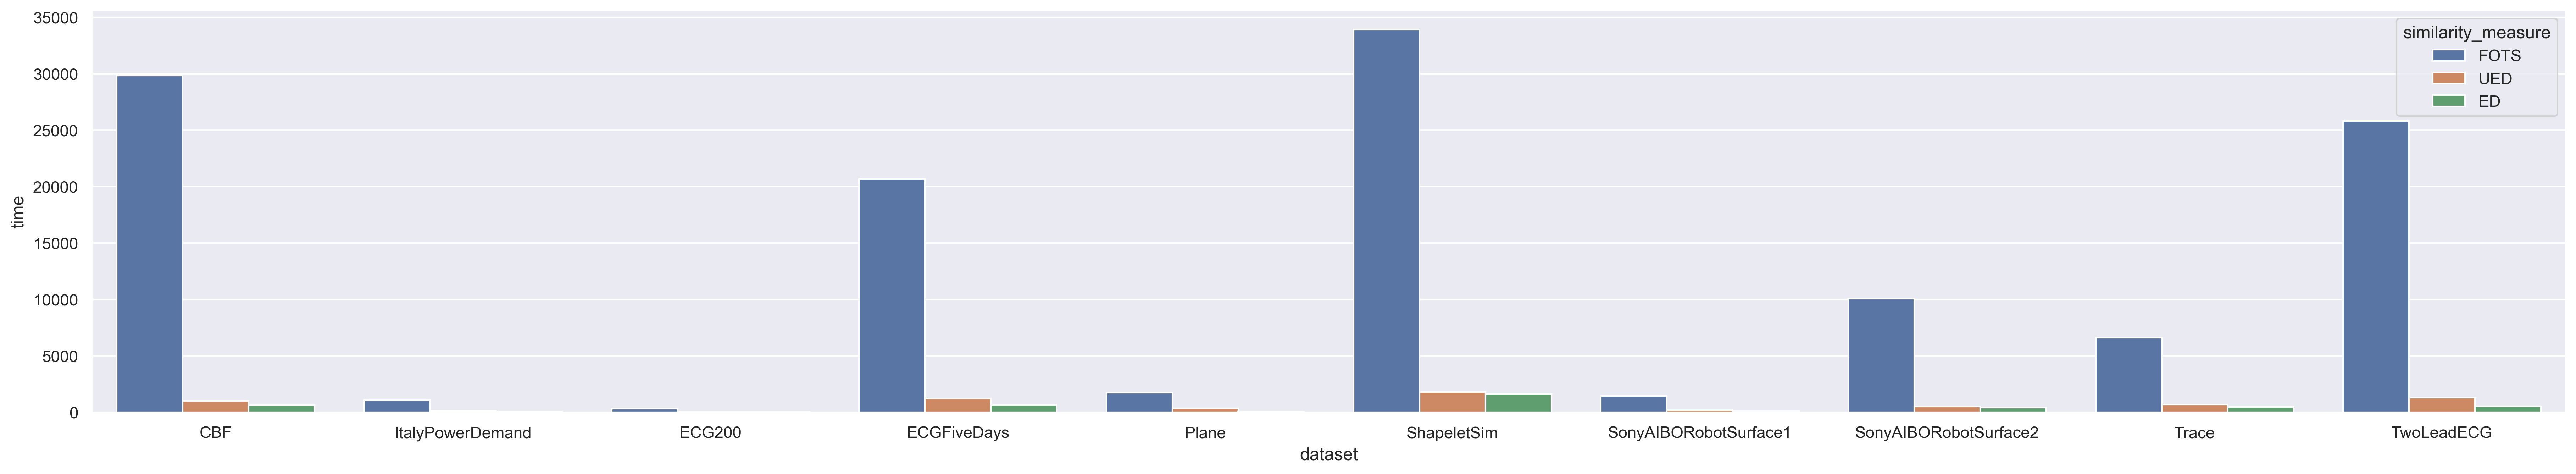

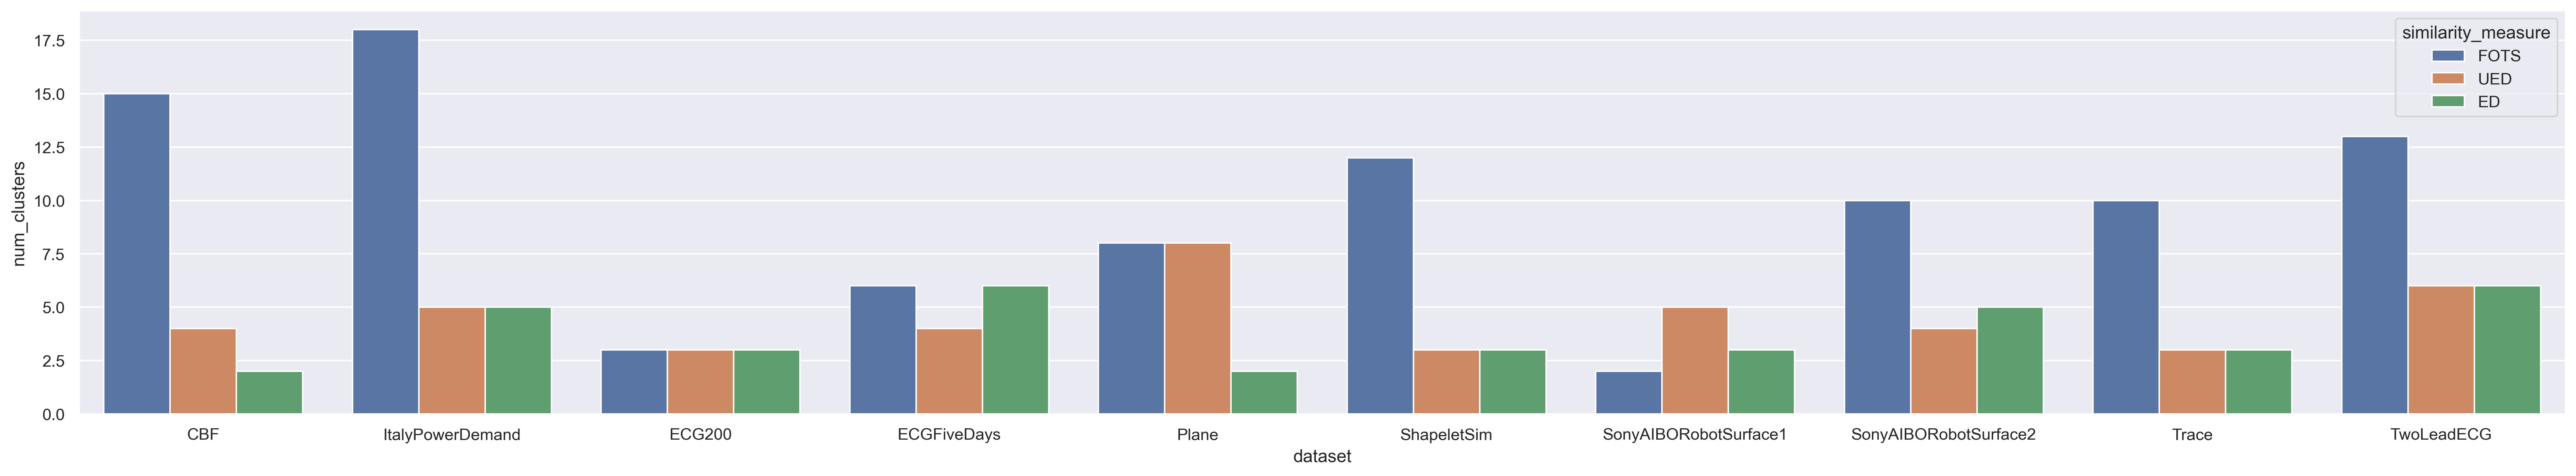

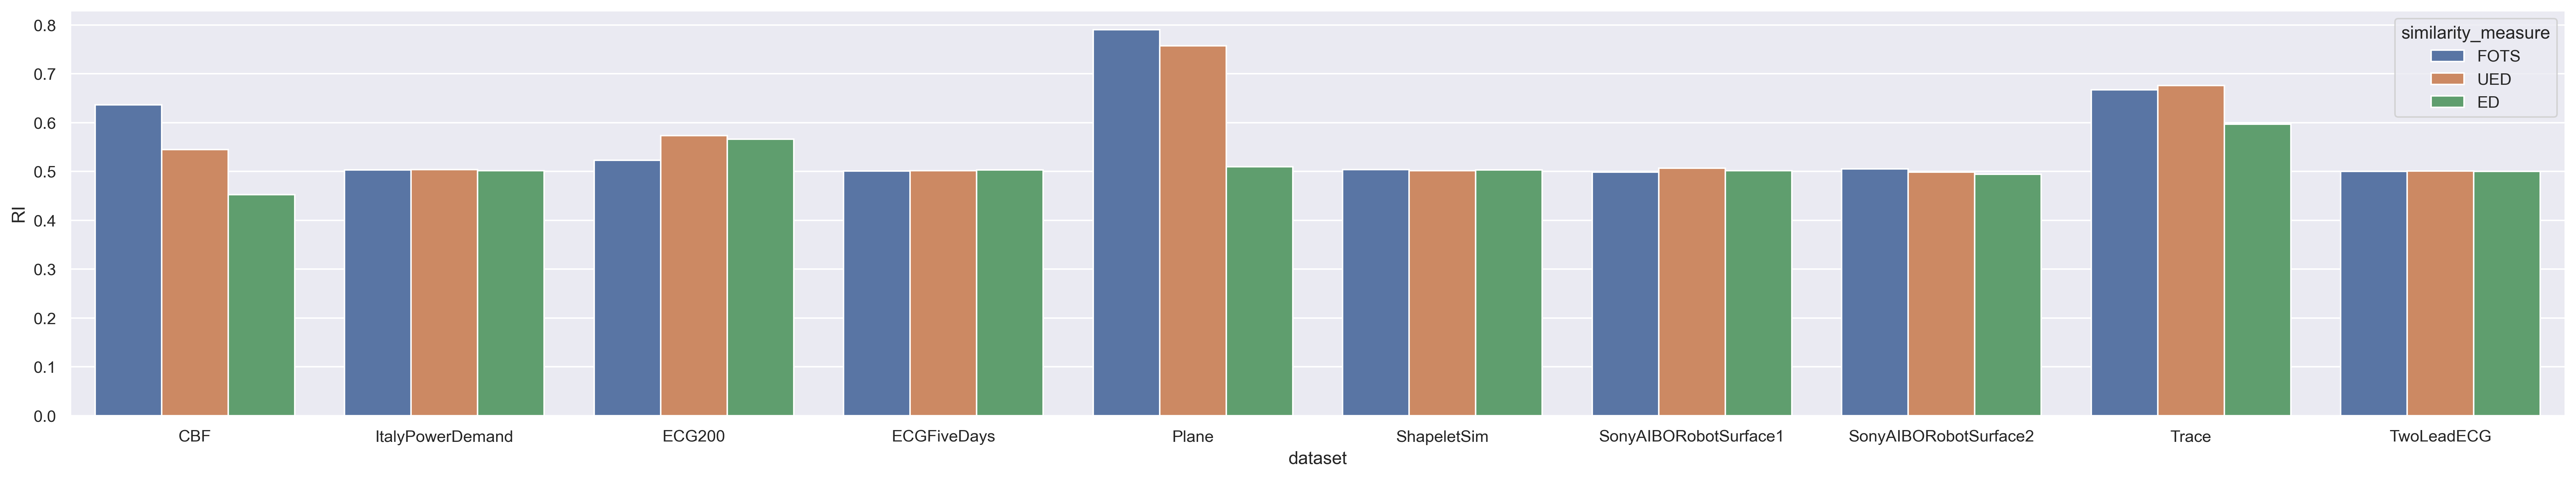

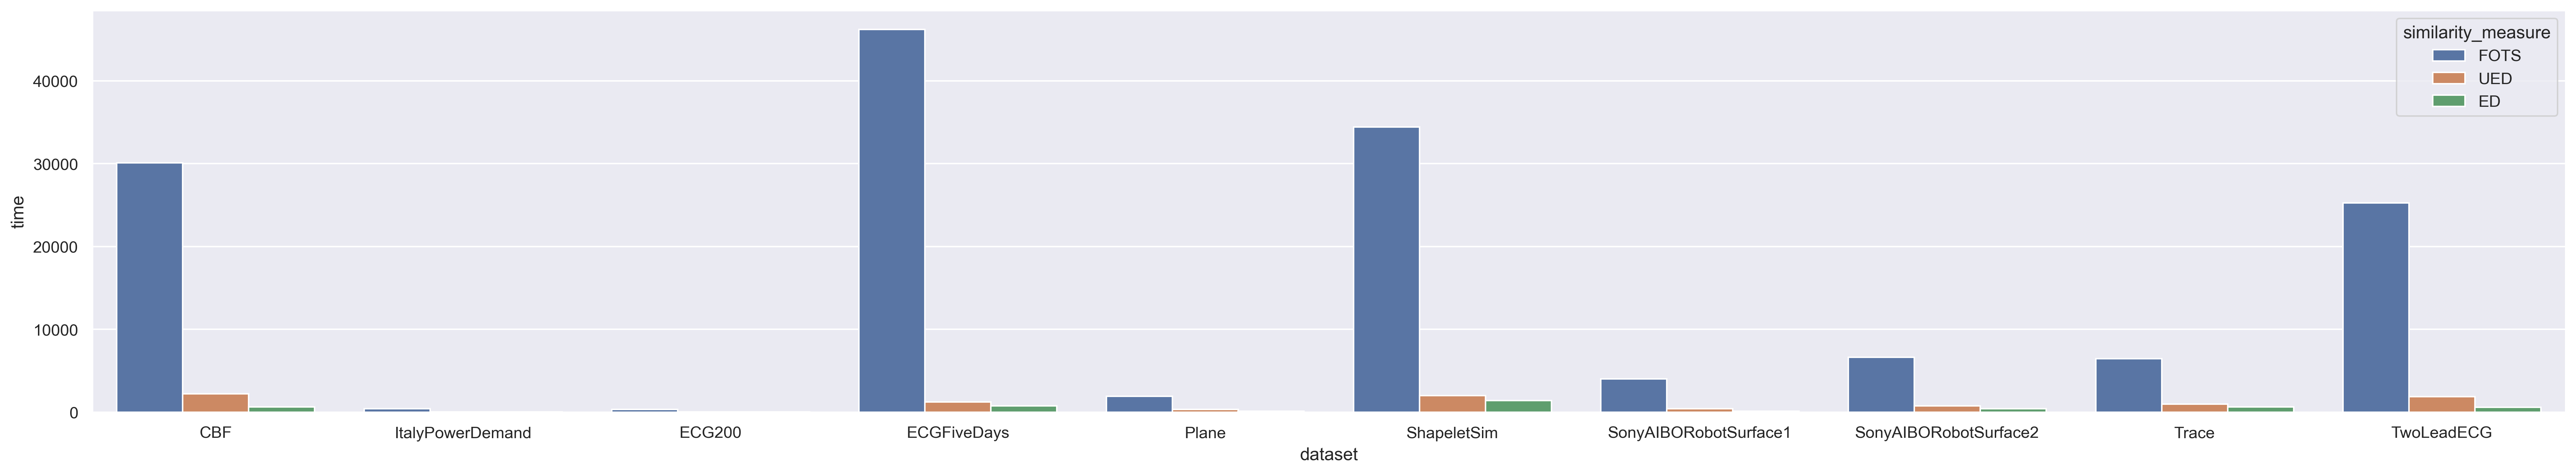

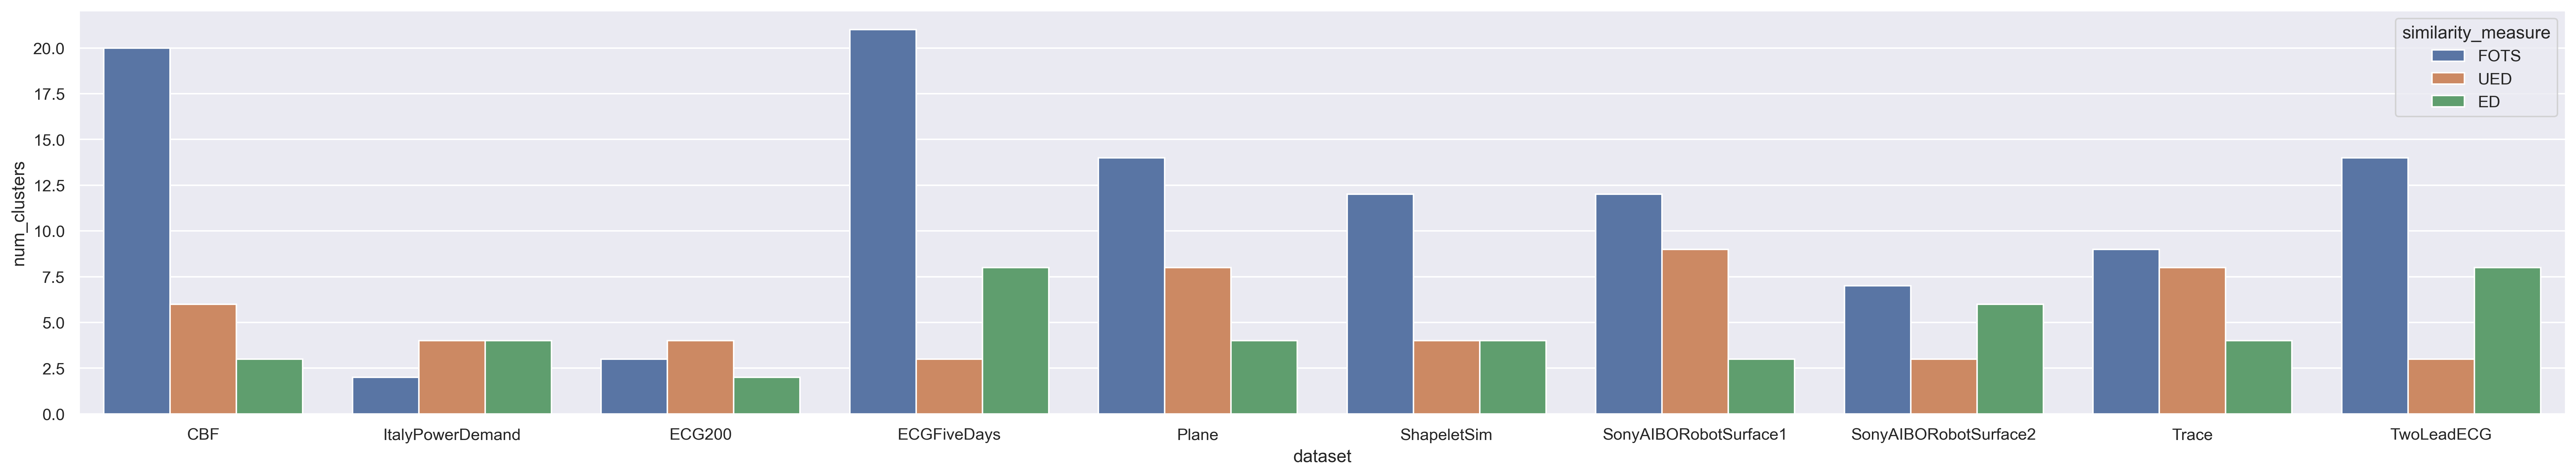

In [8]:
for uncertainty_level in uncertainty_levels:
    for metrics in ['RI', 'time', 'num_clusters']:
        fig_name = os.path.join(results_version, 'barplot_' + uncertainty_level + '_' + metrics + '.png')
    
        df_temp = df_results.reset_index(['dataset', 'uncertainty_level', 'similarity_measure'])
        df_temp = df_temp[df_temp.uncertainty_level == uncertainty_level]

        sns.set()
        plt.figure(figsize=(30, 5))
        sns.barplot(data=df_temp, x='dataset', y=metrics, hue='similarity_measure')
        plt.savefig(fig_name)